In [13]:
import opensimplex as sim
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from PIL import Image 

plt.rcParams['figure.figsize'] = (10, 10)

In [14]:
n = 100


WIDTH = 256
HEIGHT = 256
FEATURE_SIZE = 2.0

im = Image.new('L', (WIDTH, HEIGHT))
for y in range(0, HEIGHT):
    for x in range(0, WIDTH):
        value = sim.noise2(x / FEATURE_SIZE, y / FEATURE_SIZE)
        color = int((value + 1) * 128)
        im.putpixel((x, y), color)


x1 = np.random.randint(0, WIDTH, 2)
x2 = np.random.randint(0, HEIGHT, 2)

diff = x1 - x2
x1, x2, diff

(array([ 11, 198]), array([243,  45]), array([-232,  153]))

In [15]:
def construct(diff_ops, x1):
    x1tmp = x1.copy()
    ops = []
    for t in diff_ops:
        x1tmp += (t*-1)
        ops.append(x1tmp.copy())
        
    return np.array(ops)
    
def find_direction(x1, x2):
    diff = x1 - x2
    
    u = np.array([0, 1])
    d = np.array([0, -1])
    l = np.array([-1, 0])
    r = np.array([1, 0])
    
    xcom = np.array([diff[0], 0])
    ycom = np.array([0, diff[1]])
    
    name_x = []
    opsx = []
    name_y = []
    ospy = []
                
    if sum(xcom + ((abs(xcom[0]) * l)) * -1) == 0:
        name_x = ['left'] * abs(xcom[0])
        opsx = [l for x in range(abs(xcom[0]))]
    else:
        name_x = ['right'] * abs(xcom[0])
        opsx = [r for x in range(abs(xcom[0]))]
        
    if sum(ycom + ((abs(ycom[1]) * u)) * -1) == 0:
        name_y = ['up'] * abs(ycom[1])
        opsy = [u for x in range(abs(ycom[1]))]
    else:
        name_y = ['down'] * abs(ycom[1])
        opsy = [d for x in range(abs(ycom[1]))]
        
    ops = construct(opsx + opsy, x1)

    return name_x + name_y, ops, np.array(opsx + opsy)
        

In [16]:
names, base_ops, diff_ops = find_direction(x1, x2)
# diff_ops

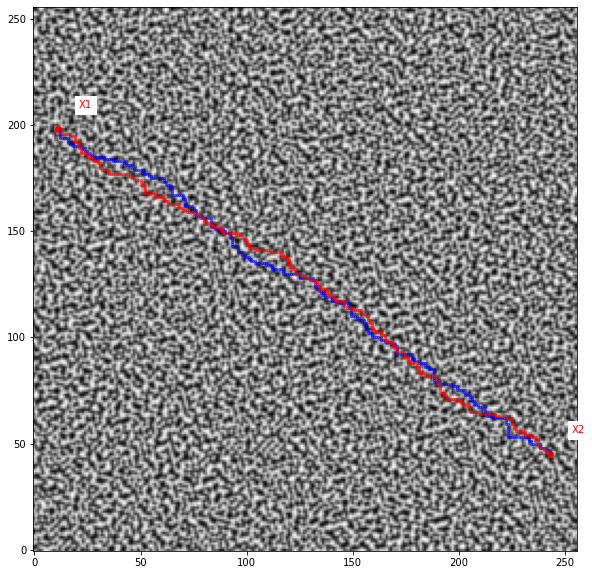

In [17]:
plt.scatter([x1[0], x2[0]], [x1[1], x2[1]], c='red')

plt.text(x1[0] + 10, x1[1] + 10, 'X1', c='red', backgroundcolor='white')
plt.text(x2[0] + 10, x2[1] + 10, 'X2', c='red', backgroundcolor='white')

# plt.scatter(ops[:, 0], ops[:, 1], c='blue', s=5)

ops_alt = diff_ops.copy()
np.random.shuffle(ops_alt)
ops_alt = construct(ops_alt, x1)
plt.scatter(ops_alt[:, 0], ops_alt[:, 1], c='blue', s=5, alpha=0.5)

ops_back = diff_ops.copy()
np.random.shuffle(ops_back)
ops_back = construct(ops_back, x1)
# print(ops_back)
plt.scatter(ops_back[:, 0], ops_back[:, 1], c='red', s=5, alpha=0.5)


# plt.plot((x1[0], x2[0]), (x1[1], x1[1]), c='red')
# plt.plot((x2[0], x2[0]), (x2[1], x1[1]), c='red')

plt.imshow(im, cmap='gray', origin='lower')